# SimpleRNN 구조와 예제

## <span style="font-size:25px">시계열 데이터 기반의 RNN 구조</span>

<dl>
<dt style="font-size:20px">▶ 시계열 데이터를 이용해서 미래 값을 예측하는 RNN 구조라면, 다음과 같은 w, h 등 
<br>　 을 설정하여 일정한 길이로 패턴을 잘라서 학습 데이터를 만들어야 함
</dt><br>
<dd style="font-size:18">
✔ 이전 데이터 몇 개를 묶을 것인지 나타내는 윈도우 크기(window size) w 설정
<br><br>
✔ 얼마나 먼 미래 값을 예측할 것인지를 지정하는 수평선 계수(horizon fatctor) h 설정
<br><br>
<img src="picture/TF_img_19_1.png" alt="TF_img_19_1" width=650>
</dd>
</dl>

## <span style="font-size:25px">SimpleRNN API - tf.keras.layers.SimpleRNN()</span>

<dl>
<dt style="font-size:20px">▶ 앞쪽 3개의 숫자를 바탕으로 그 다음에 오는 숫자를 예측하는 경우, 예를 들어 
<br>　 [1.0, 2.0, 3.0] 입력에 대해서 [4.0] 예측하고, [2.0, 3.0, 4.0] 입력에 대해서는 
<br>　 [5.0] 예측하기 위해서 1개의 SimpleRNN 레이어를 가지는 모델을 구축하는 경우, 
</dt><br>
<dd>
<img src="picture/TF_img_19_2.png" alt="TF_img_19_2" width=650>
</dd>
</dl>

## <span style="font-size:25px">RNN 개발 프로세스</span>

<img src="picture/TF_img_19_3.png" alt="TF_img_19_3" width=650>

## <span style="font-size:25px">SimpleRNN Example</span>

In [1]:
# [1] 시계열 데이터 y = 0.5*sin(2*x) - cos(x/2) 정의

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras import Sequential

x = np.arange(0, 100, 0.1)
y = 0.5 * np.sin(2.0 * x) - np.cos(x / 2.0)     # 1,000개의 시계열 데이터

seq_data = y.reshape(-1, 1)

print(seq_data.shape)
print(seq_data[:5])

(1000, 1)
[[-1.        ]
 [-0.89941559]
 [-0.80029499]
 [-0.70644984]
 [-0.62138853]]


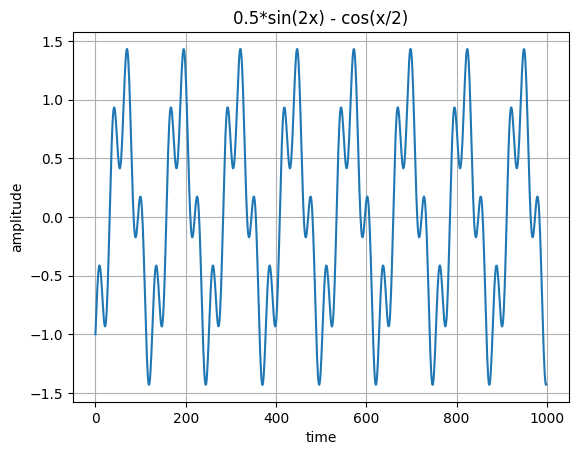

In [2]:
plt.grid()
plt.title('0.5*sin(2x) - cos(x/2)')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.plot(seq_data)
plt.show()

In [13]:
# [2] 입력 데이터 X, 정답 데이터 Y 생성

def seq2dataSet(seq, window, horizon):
    
    X, Y = [], []   # 각각 입력, 정답 데이터

    for i in range(len(seq) - (window + horizon) + 1):

        x = seq[i:(i + window)]
        y = seq[i + window + horizon - 1]
        
        X.append(x), Y.append(y)

    return np.array(X), np.array(Y)

In [14]:
w = 20      # window size
h = 1       # horizon factor

X, Y = seq2dataSet(seq_data, w, h)

print(X.shape, Y.shape)

(980, 20, 1) (980, 1)


In [15]:
# [3] 트레이닝 / 테스트 데이터 분리

split_ratio = 0.8       # 1:4

split = int(split_ratio*len(X))

x_train = X[0:split]
t_train = Y[0:split]

x_test = X[split:]
t_test = Y[split:]

print(x_train.shape, t_train.shape, 
      x_test.shape, t_test.shape)

(784, 20, 1) (784, 1) (196, 20, 1) (196, 1)


In [16]:
# [4] SimpleRNN 모델 구축

model = Sequential()

model.add(SimpleRNN(units=128, 
                    activation='tanh', 
                    input_shape=x_train[0].shape))      # input_shape=(20, 1)

model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               16640     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [17]:
# [5] SimpleRNN 모델 컴파일 및 학습

model.compile(loss='mse', optimizer='Adam', metrics=['mae'])

hist = model.fit(x_train, t_train, epochs=100, validation_data=(x_test, t_test))

Epoch 1/100
25/25 [==============================] - 4s 37ms/step - loss: 0.0352 - mae: 0.1459 - val_loss: 0.0089 - val_mae: 0.0784
Epoch 2/100
25/25 [==============================] - 1s 25ms/step - loss: 0.0030 - mae: 0.0428 - val_loss: 0.0017 - val_mae: 0.0354
Epoch 3/100
25/25 [==============================] - 1s 25ms/step - loss: 9.2269e-04 - mae: 0.0246 - val_loss: 5.8422e-04 - val_mae: 0.0199
Epoch 4/100
25/25 [==============================] - 1s 25ms/step - loss: 4.7644e-04 - mae: 0.0175 - val_loss: 3.0854e-04 - val_mae: 0.0138
Epoch 5/100
25/25 [==============================] - 1s 26ms/step - loss: 2.6897e-04 - mae: 0.0129 - val_loss: 1.5959e-04 - val_mae: 0.0098
Epoch 6/100
25/25 [==============================] - 1s 28ms/step - loss: 1.7575e-04 - mae: 0.0105 - val_loss: 1.0221e-04 - val_mae: 0.0078
Epoch 7/100
25/25 [==============================] - 1s 27ms/step - loss: 1.2897e-04 - mae: 0.0089 - val_loss: 9.8470e-05 - val_mae: 0.0078
Epoch 8/100
25/25 [=================

In [18]:
# [6] 손실 및 정확도

pred = model.predict(x_test)
print(pred.shape)

7/7 [==============================] - 0s 5ms/step
(196, 1)


In [19]:
rand_idx = np.random.randint(0, len(t_test), size=5)

print('random idx =', rand_idx, '\n')
print('pred =', pred.flatten()[rand_idx])
print('label =', t_test.flatten()[rand_idx])

rand_idx = np.random.randint(0, len(t_test), size=5)

print('rand idx =', rand_idx, '\n')
print('pred =', pred.flatten()[rand_idx])
print('label =', t_test.flatten()[rand_idx])

random idx = [ 99  19 158  93   7] 

pred = [-0.88486093  1.4161339   0.2058124  -0.798859    0.48977464]
label = [-0.89183364  1.42498073  0.21475726 -0.80823254  0.49907979]
rand idx = [170  63  48 131 139] 

pred = [-0.00366375 -1.0920005   0.14844276  0.42428136  1.0470083 ]
label = [ 0.00531309 -1.09409016  0.15489396  0.43232817  1.05178466]


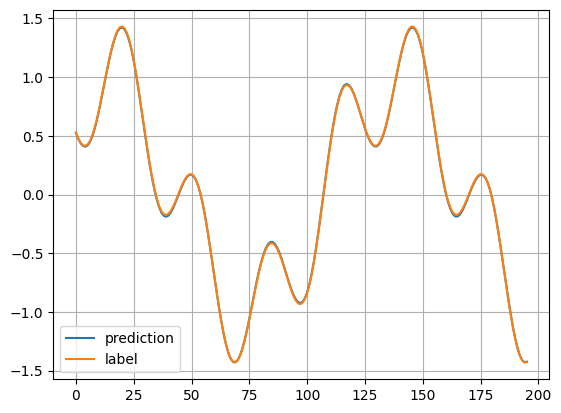

In [20]:
plt.plot(pred, label='prediction')
plt.plot(t_test, label='label')
plt.grid()
plt.legend(loc='best')
plt.show()